In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, scale
import numpy as np
from scipy.stats import ttest_rel
import liwc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
corr_df1 = pd.read_csv('../data/annotation_study/MELD_trial_corrs_S1_dev.csv')
corr_df2 = pd.read_csv('../data/annotation_study/MELD_trial_corrs_S2_dev.csv')
corr_df3 = pd.read_csv('../data/annotation_study/MELD_trial_corrs_S3_dev.csv')
corr_df4 = pd.read_csv('../data/annotation_study/MELD_trial_corrs_S4_dev.csv')
corr_df5 = pd.read_csv('../data/annotation_study/MELD_trial_corrs_S5_dev.csv')

In [29]:
corr_df = pd.concat([corr_df1, corr_df2, corr_df3, corr_df4, corr_df5])

In [30]:
corr_df['sentence_length'] = corr_df['sentence'].apply(lambda x: len(x.split(' ')))

In [31]:
corr_df1

,sentence,sentecon_liwc_corr,senteconplus_liwc_corr,liwc_corr,liwc_soft_corr
0,What?,-0.054,0.251,0.112,0.218
1,Really?!,0.175,-0.011,0.211,-0.153
2,Hi Ross!,0.448,0.361,0.178,0.283
3,It’s really sweet and-and tender.,0.273,0.325,0.001,0.284
4,Tell her to wear her own earrings.,0.307,0.445,0.222,0.239
5,Yeah.,0.485,0.612,0.612,0.236
6,we talked through most of the night and we rea...,0.425,0.360,0.318,0.001
7,This is totally your fault!,0.663,0.672,0.453,0.358
8,My first time with Carol was...,0.456,0.487,0.166,0.234
9,"Yeah, right. Sure!",0.196,0.263,0.038,0.246


In [32]:
corr_df

,sentence,sentecon_liwc_corr,senteconplus_liwc_corr,liwc_corr,liwc_soft_corr,sentence_length
0,What?,-0.054,0.251,0.112,0.218,1
1,Really?!,0.175,-0.011,0.211,-0.153,1
2,Hi Ross!,0.448,0.361,0.178,0.283,2
3,It’s really sweet and-and tender.,0.273,0.325,0.001,0.284,5
4,Tell her to wear her own earrings.,0.307,0.445,0.222,0.239,7
...,...,...,...,...,...,...
15,You won't even taste it?,0.115,0.034,0.135,0.160,5
16,"Oh my God, Phoebe,",0.220,0.256,0.056,0.276,4
17,I still don't get why Greg and Jenny would giv...,0.366,0.342,0.474,0.196,14
18,What’s this?,0.205,-0.030,0.071,0.180,2


In [33]:
np.mean(corr_df, axis=0)

sentecon_liwc_corr        0.29840
senteconplus_liwc_corr    0.29001
liwc_corr                 0.23831
liwc_soft_corr            0.22230
sentence_length           7.55000
dtype: float64

In [34]:
corr_df.median(axis=0)

sentecon_liwc_corr        0.2955
senteconplus_liwc_corr    0.3045
liwc_corr                 0.2360
liwc_soft_corr            0.2380
sentence_length           6.0000
dtype: float64

In [35]:
# Paired two-sided t-test
print(ttest_rel(corr_df['sentecon_liwc_corr'].values, corr_df['liwc_corr'].values))

# Paired one-sided t-test
print(ttest_rel(corr_df['sentecon_liwc_corr'].values, corr_df['liwc_corr'].values,
         alternative='greater'))

Ttest_relResult(statistic=3.1239234429973792, pvalue=0.0023410683988786245)
Ttest_relResult(statistic=3.1239234429973792, pvalue=0.0011705341994393123)


In [36]:
# Paired two-sided t-test
print(ttest_rel(corr_df['sentecon_liwc_corr'].values, corr_df['liwc_soft_corr'].values))

# Paired one-sided t-test
print(ttest_rel(corr_df['sentecon_liwc_corr'].values, corr_df['liwc_soft_corr'].values,
         alternative='greater'))

Ttest_relResult(statistic=3.4904180529457354, pvalue=0.0007217431126039996)
Ttest_relResult(statistic=3.4904180529457354, pvalue=0.0003608715563019998)


In [37]:
# Paired two-sided t-test
print(ttest_rel(corr_df['senteconplus_liwc_corr'].values, corr_df['liwc_corr'].values))

# Paired one-sided t-test
print(ttest_rel(corr_df['senteconplus_liwc_corr'].values, corr_df['liwc_corr'].values,
         alternative='greater'))

Ttest_relResult(statistic=2.938861634251958, pvalue=0.004099278750960168)
Ttest_relResult(statistic=2.938861634251958, pvalue=0.002049639375480084)


In [38]:
# Paired two-sided t-test
print(ttest_rel(corr_df['senteconplus_liwc_corr'].values, corr_df['liwc_soft_corr'].values))

# Paired one-sided t-test
print(ttest_rel(corr_df['senteconplus_liwc_corr'].values, corr_df['liwc_soft_corr'].values,
         alternative='greater'))

Ttest_relResult(statistic=3.185639769054762, pvalue=0.0019321469935597367)
Ttest_relResult(statistic=3.185639769054762, pvalue=0.0009660734967798683)


In [39]:
# Paired two-sided t-test
print(ttest_rel(corr_df['senteconplus_liwc_corr'].values, corr_df['sentecon_liwc_corr'].values))

# Paired one-sided t-test
print(ttest_rel(corr_df['senteconplus_liwc_corr'].values, corr_df['sentecon_liwc_corr'].values,
         alternative='greater'))

Ttest_relResult(statistic=-0.6264144554234331, pvalue=0.5324848707322185)
Ttest_relResult(statistic=-0.6264144554234331, pvalue=0.7337575646338907)


In [41]:
# Paired two-sided t-test
print(ttest_rel(corr_df['liwc_corr'].values, corr_df['liwc_soft_corr'].values))

# Paired one-sided t-test
print(ttest_rel(corr_df['liwc_corr'].values, corr_df['liwc_soft_corr'].values,
         alternative='greater'))

Ttest_relResult(statistic=0.7550750741302787, pvalue=0.4519965360754741)
Ttest_relResult(statistic=0.7550750741302787, pvalue=0.22599826803773704)


In [3]:
def barplot_annotate_brackets(num1, num2, data, center, height, yerr=None, dh=.05, barh=.05, fs=None, maxasterix=None):
    """ 
    Annotate barplot with p-values.

    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """

    if type(data) is str:
        text = data
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # etc.
        text = ''
        p = .05

        while data < p:
            text += '*'
            p /= 10.

            if maxasterix and len(text) == maxasterix:
                break

        if len(text) == 0:
            text = 'n. s.'

    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]

    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]

    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)

    y = max(ly, ry) + dh

    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)

    plt.plot(barx, bary, c='black')

    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs

    plt.text(*mid, text, **kwargs)

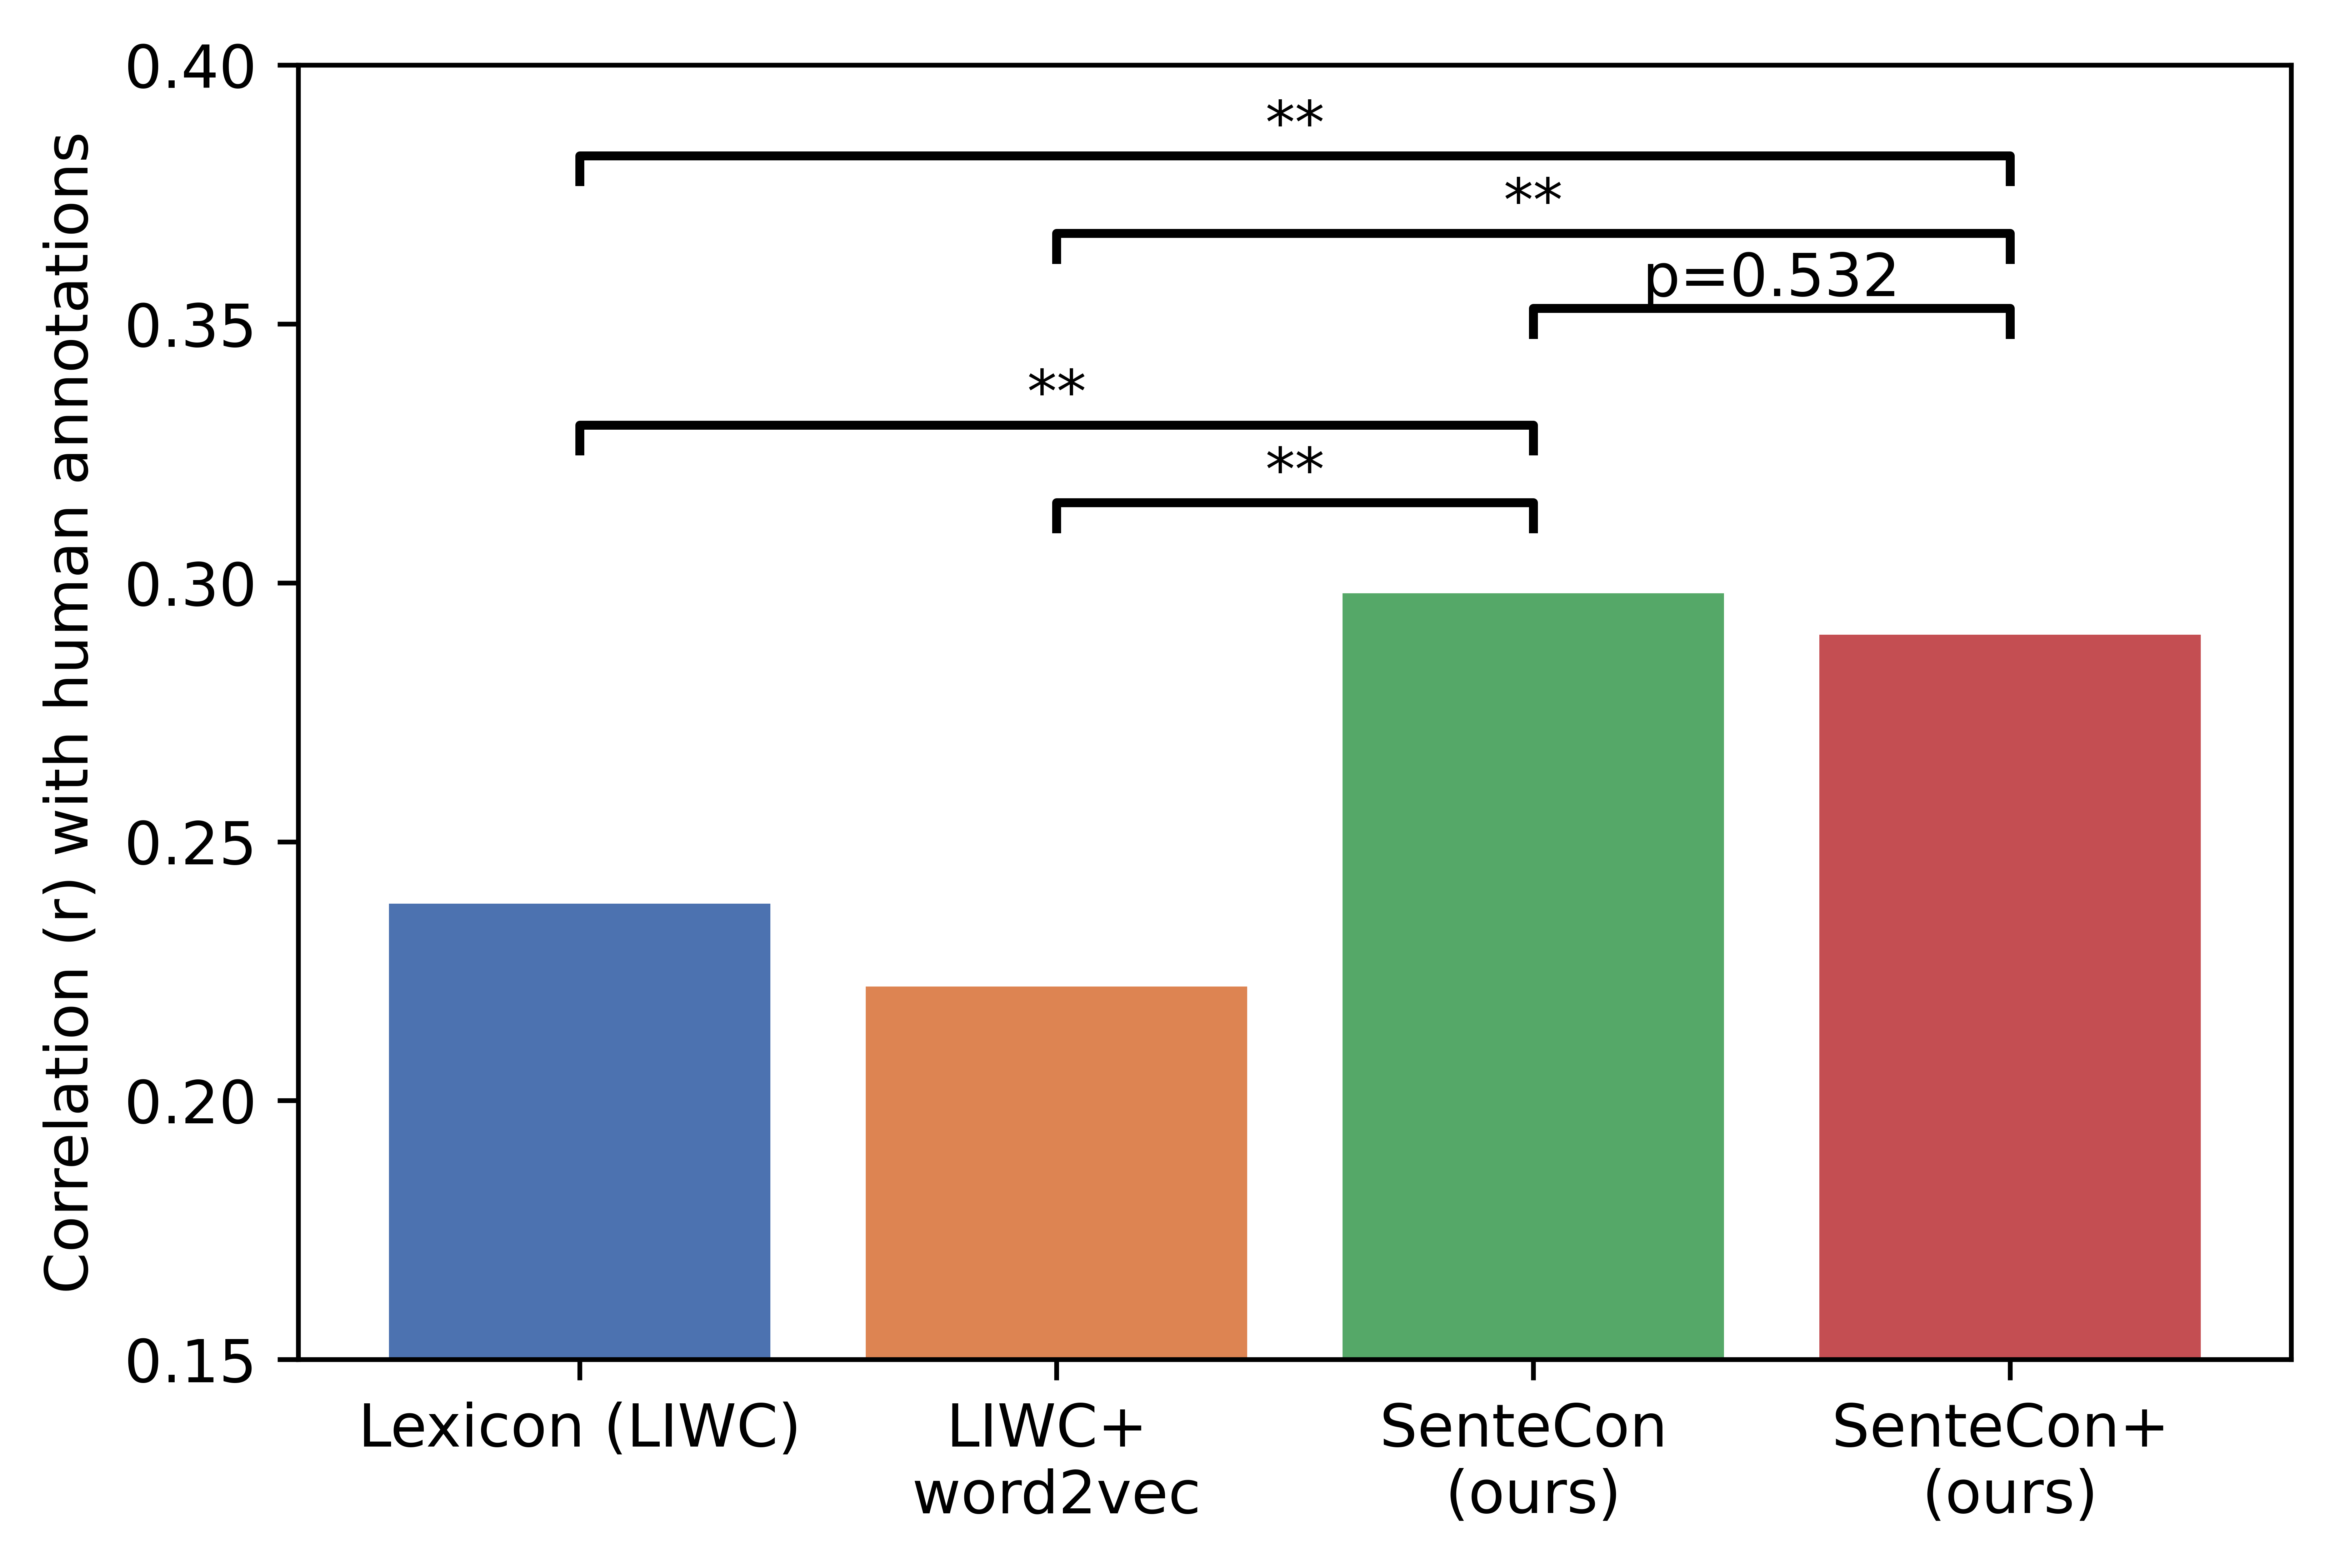

In [70]:
heights = [0.238, 0.222, 0.298, 0.290]
bars = np.arange(len(heights))

cmap = sns.color_palette('deep', as_cmap=True)

plt.figure(dpi=1200)
plt.bar(bars, heights, align='center', color=cmap)
plt.ylim(0.15, 0.4)
barplot_annotate_brackets(0, 2, 0.002, bars, heights, dh=0.11, barh=0.02)
barplot_annotate_brackets(0, 3, 0.004, bars, heights, dh=0.35, barh=0.02)
barplot_annotate_brackets(1, 2, 0.0007, bars, heights, barh=0.02)
barplot_annotate_brackets(1, 3, 0.0019, bars, heights, dh=0.29, barh=0.02)
plt.xticks(range(len(heights)), ['Lexicon (LIWC)', 'LIWC+ \nword2vec', 'SenteCon \n(ours)', 'SenteCon+ \n(ours)'])
barplot_annotate_brackets(2, 3, 'p=0.532', bars, heights, dh=0.2, barh=0.02)
plt.ylabel('Correlation (r) with human annotations')
plt.savefig('/Users/victorialin/Desktop/mount_desktop/2021-2022/Research/sentence_liwc/results/figures/human_corrs.png')

In [11]:
import os
os.getcwd()

'/Users/victorialin/Desktop/mount_desktop/2021-2022/Research/sentence_liwc/annotation_scripts'